In [133]:
import pybroker as pyb
from datetime import datetime
from pybroker import ExecContext, Strategy, YFinance, StrategyConfig, portfolio, context
import talib
from datetime import datetime , timedelta
import pandas as pd
import numpy as np

pyb.enable_data_source_cache('rebalancing')
#p = portfolio.Portfolio(10000)
config = StrategyConfig(initial_cash=10000)




securities = ["QQQ", "SHY", "PSQ"]


In [2]:
talib.SMA(data, )

<function talib._ta_lib.SMA>

In [144]:
rsi_10 = pyb.indicator('rsi_10', lambda data: talib.RSI(data.close, timeperiod=10))

mva_200 = pyb.indicator("mva_200", lambda data : talib.SMA(data.close , timeperiod=200))
mva_20 =  pyb.indicator("mva_200", lambda data : talib.SMA(data.close , timeperiod=20))





#securities =  ['AMAT', 'ASML', 'DMLP', 'EXPD', 'EXPI', 'INMD', 'LSTR', 'LULU', 'META', 'MSB', 'MSFT', 'RVLV', 'SIMO', 'SMLR', 'STKS', 'TER', 'VALE', 'ULTA']

start_date = "01/01/20"
end_date = "01/01/23"

yf = YFinance()
start_date_temp = datetime.strptime(start_date, "%m/%d/%y")

# Convert start date string to datetime object

# Add 60 days

spy_start_date = start_date_temp - timedelta(days=250)

psq_start_date = start_date_temp - timedelta(days=30)

rsis_10 = {}
for s in securities[1:]:
    data =  yf.query(s, psq_start_date, end_date)
    rsis_10[s] = rsi_10(data)


spy = yf.query("SPY", spy_start_date, end_date)

qqq = yf.query("QQQ", psq_start_date, end_date)

qqq_sma = mva_20(qqq)
spy_sma = mva_200(spy)

rsis = {}
for s in securities:
    data = yf.query(s, psq_start_date, end_date)

    rsis[s] = rsi_10(data)







    



Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.

Loaded cached bar data.



In [135]:
spy_sma

2019-04-26           NaN
2019-04-29           NaN
2019-04-30           NaN
2019-05-01           NaN
2019-05-02           NaN
                 ...    
2021-12-27    435.577850
2021-12-28    435.980150
2021-12-29    436.388000
2021-12-30    436.782500
2021-12-31    437.199899
Length: 678, dtype: float64

In [146]:
set_inital_allocs = {
    "QQQ" : 0.0,
    "SHY" : 0.0,
    "PSQ" : 0.0
}


start_0 = start_date_temp - timedelta(days=8)
# Convert end date to string format

start_0 = start_0.strftime("%Y-%m-%d")

if spy_sma.loc[start_0] <  spy[spy["date"]==start_0]["open"].values[0]:
    set_inital_allocs['QQQ'] = 1.0

else:
    if qqq_sma.loc[start_0]  > qqq[qqq["date"]==start_0]["open"].values[0]:
        
        rsi_shy = rsis_10["SHY"].loc[start_0]
        rsi_psq = rsis_10["PSQ"].loc[start_0]

        if rsi_shy > rsi_psq:
            set_inital_allocs["SHY"] = 1.0
        else:
            set_inital_allocs["PSQ"] = 1.0

    else:
        set_inital_allocs["QQQ"] = 1.0


        

        








In [137]:
set_inital_allocs

{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}

In [159]:
trigs = []

cur2=[]
dates=[]
TOTAL =[]
trade_exec = {}
    #print(((ctxs["TSLA"]._curr_date)))
def shell(ctxs:dict[str, ExecContext]):
    #print(ctxs)
    pass 
    

def buy_low(ctxs: dict[str, ExecContext]):
    # If shares were already purchased and are currently being held, then return.
    
    triggered = False 

    

    #for c in list(ctxs.keys()):
      #  pos = ctxs[c].long_pos()
       # if pos:
       #  cur_port_val += float(ctxs[c].open*float(pos.shares))

   # print(type(cur_port_val))

    dt = tuple(ctxs.values())[0].dt
    date_object = datetime.strptime(str(dt), "%Y-%m-%d %H:%M:%S")

# Convert datetime object to the desired format
    dt2 = date_object.strftime("%Y-%m-%d")
    st0 = start_date_temp.strftime("%Y-%m-%d")
    st0 = str(st0)
    print(dt2)
    #print(dt2)

    expected_alloc = {}


    for s in securities:
     expected_alloc[s] = 0.0

    if spy_sma.loc[dt2] <  spy[spy["date"]==dt2]["open"].values[0]:
      #print(spy_sma)
      expected_alloc['QQQ'] = 1.0

    else:
     #print("Here")
     if qqq_sma.loc[dt2]  > qqq[qqq["date"]==dt2]["open"].values[0]:
        
        rsi_shy = rsis_10["SHY"].loc[dt2]
        rsi_psq = rsis_10["PSQ"].loc[dt2]

        if rsi_shy > rsi_psq:
            expected_alloc["SHY"] = 1.0
        else:
            expected_alloc["PSQ"] = 1.0

     else:
         expected_alloc["QQQ"] = 1.0
      
    print(expected_alloc)
    if dt2 == "2020-01-02":
       #print("DT2 " ,dt2)

       cur_alloc = set_inital_allocs

       for c in cur_alloc.keys():
         if cur_alloc[c] > 0:
            shares_init = ctxs[c].calc_target_shares(cur_alloc[c]) 
            ctxs[c].buy_shares = shares_init 



    else:
        total_eq = 0
        cur_alloc = {}
        #position_x=0
        #totals=[]
        for s in securities:
            #totals.append(ctxs[s].total_equity)

            print("Here man !!!!!")
            pos =ctxs[s].long_pos()
        
            if pos:
                positions_x = pos.shares 
                print("XXXXXXXXXX" ,pos.shares)
            else:
                positions_x = 0
            print(total_eq)

            total_eq  += (ctxs[s].open[0] * float(positions_x))

        TOTAL.append(total_eq)
        print("Total is ", total_eq)
        for se in securities:
            pos =ctxs[se].long_pos()
            if pos:
                positions_x = pos.shares 
            else:
                positions_x = 0
            
            print(positions_x)
 
            ca = (ctxs[se].open[0] * float(positions_x)) / float(total_eq)
            cur_alloc[se] = ca

        #totalss.append(totals)
    print(cur_alloc)
    #cout=
    for ct in list(ctxs.keys()):
     #print("Val is ", abs(expected_alloc[ct] - cur_alloc[ct]) )
      #cout+=1
      #print("Cout ", cout
      
      if abs(expected_alloc[ct] - cur_alloc[ct])  >= 0.12:

        triggered= True 
        #print("Val is " , abs(expected_alloc[ct] - cur_alloc[ct])  )
        break

        #print("triggered")
    


    if triggered:
        #trigs.append("x")
        dates.append(dt2)

        buys =  {}
        sells = {}

        for e in expected_alloc.keys():
            shares = ctxs[e].calc_target_shares(expected_alloc[e])
            pos = ctxs[e].long_pos()

            if not pos: 
              ctxs[e].buy_shares = shares
              buys[e] = shares
            elif pos.shares < shares:
               ctxs[e].buy_shares = shares - pos.shares
               buys[e] = shares - pos.shares
               #buyquant.append(shares - pos.shares)
            else:
               ctxs[e].sell_shares = pos.shares - shares
               sells[e] = float(pos.shares - shares)
               #sellquant.append(shares - pos.shares)

        trade_exec[dt2] = {"buy" : buys, "sells" : sells}
               

            
            
              
    
    else:

        pass

            
strategy = Strategy(YFinance(), start_date=start_date, end_date=end_date, config=config)
strategy.set_before_exec(buy_low)
strategy.add_execution(shell, securities)

#strategy.add_execution(short_high, ['MSFT'])

result = strategy.backtest()





Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 756) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  8% (61 of 756) |#                      | Elapsed Time: 0:00:00 ETA:  00:00:00
 18% (141 of 756) |####                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 31% (241 of 756) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:00


2020-01-02
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2020-01-03
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2020-01-06
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2020-01-07
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2020-01-08
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2020-01-09
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}

 45% (341 of 756) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 57% (431 of 756) |############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 70% (531 of 756) |###############       | Elapsed Time: 0:00:00 ETA:   0:00:00
 79% (601 of 756) |#################     | Elapsed Time: 0:00:00 ETA:   0:00:00



Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2021-04-07
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2021-04-08
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2021-04-09
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2021-04-12
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 46
0
Here man !!!!!
9862.399719238281
Here man !!!!!
9862.399719238281
Total is  9862.399719238281
46
0
0

 87% (661 of 756) |###################   | Elapsed Time: 0:00:00 ETA:   0:00:00
 95% (721 of 756) |####################  | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (756 of 756) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 44
0
Here man !!!!!
9433.599731445312
Here man !!!!!
9433.599731445312
Total is  9433.599731445312
44
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2022-07-28
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 44
0
Here man !!!!!
9433.599731445312
Here man !!!!!
9433.599731445312
Total is  9433.599731445312
44
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2022-07-29
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 44
0
Here man !!!!!
9433.599731445312
Here man !!!!!
9433.599731445312
Total is  9433.599731445312
44
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2022-08-01
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 44
0
Here man !!!!!
9433.599731445312
Here man !!!!!
9433.599731445312
Total is  9433.599731445312
44
0
0
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
2022-08-02
{'QQQ': 1.0, 'SHY': 0.0, 'PSQ': 0.0}
Here man !!!!!
XXXXXXXXXX 44
0
Here man !!!!!
9433.599731445312
Here man !!!!!
9433.59973144531

In [39]:
ctx

659

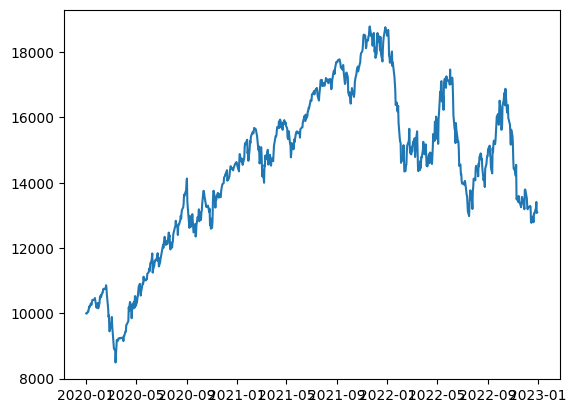

In [148]:
import matplotlib.pyplot as plt
chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])




In [151]:
result.portfolio.to_csv("qld_simple.csv")

In [152]:
result.trades.to_csv("qld_simple_trades.csv")

In [163]:
import pickle
with open('qld_simple.pkl', 'wb') as fp:
    pickle.dump(trade_exec, fp)

In [165]:
result.portfolio.to_csv("qld_simple_results.csv")